In [1]:
pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import opendatasets
opendatasets.download("https://www.kaggle.com/datasets/samaneheslamifar/facial-emotion-expressions")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: silpavg
Your Kaggle Key: ··········


100%|██████████| 121M/121M [00:06<00:00, 20.3MB/s]


In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import tensorflow as tf


# size of the image: 48*48 pixels
pic_size = 48
data_folder = '/content/facial-emotion-expressions/images/'
print(os.listdir(data_folder))
train_classes= os.listdir(data_folder + "train")
validation_classes = os.listdir(data_folder + "validation")
print('Classes in Training Set: ',train_classes)
print('Classes in Validation Set: ' ,validation_classes)



['images', 'validation', 'train']
Classes in Training Set:  ['sad', 'surprise', 'disgust', 'happy', 'neutral', 'fear', 'angry']
Classes in Validation Set:  ['sad', 'surprise', 'disgust', 'happy', 'neutral', 'fear', 'angry']


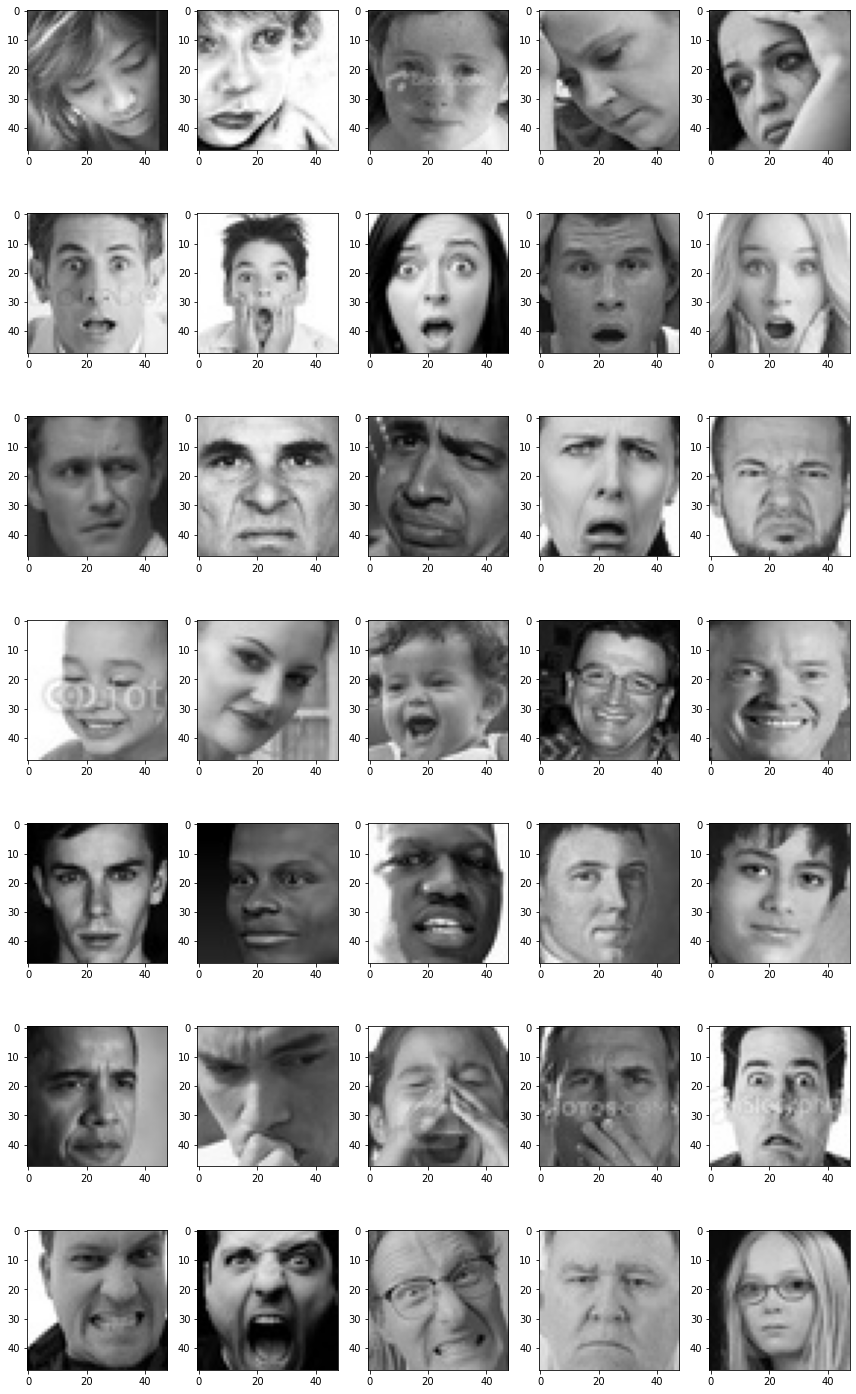

In [4]:
from tensorflow.keras.utils import load_img

plt.figure(0, figsize=(12,20))
cpt = 0

for expression in os.listdir(data_folder + "train/"):
    for i in range(1,6):
        cpt = cpt + 1
        plt.subplot(7,5,cpt)
        img = load_img(data_folder + "train/" + expression + "/" +os.listdir(data_folder + "train/" + expression)[i], target_size=(pic_size, pic_size))
        plt.imshow(img, cmap="gray")

plt.tight_layout()
plt.show()

In [5]:
for expression in os.listdir(data_folder + "train"):
    print(str(len(os.listdir(data_folder + "train/" + expression))) + " " + expression + " images")

4938 sad images
3205 surprise images
436 disgust images
7164 happy images
4982 neutral images
4103 fear images
3993 angry images


In [6]:
from keras.preprocessing.image import ImageDataGenerator

# number of images to feed into the NN for every batch
batch_size = 32

train_datagen = ImageDataGenerator()
validation_datagen = ImageDataGenerator()

train_ds = train_datagen.flow_from_directory(data_folder + "train",
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

validation_ds = validation_datagen.flow_from_directory(data_folder + "validation",
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [17]:
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential
from keras.optimizers import Adam

nb_classes = 7

model = Sequential()

#Convolution Layer
model.add(Conv2D(16,(5,5), padding='same', input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
#Convolution Layer

model.add(Conv2D(32,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

#Convolution Layer
model.add(Conv2D(64,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

#Convolution Layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

#Convolution Layer
model.add(Conv2D(256,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))


#Flattening
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

#Softmax
model.add(Dense(nb_classes, activation='softmax'))

#Optimization
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
epochs = 100

from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

history = model.fit(train_ds,
                  epochs=epochs,
                  validation_data = validation_ds,
                  )

Epoch 1/100
901/901 [==============================] - 18s 19ms/step - loss: 1.7537 - accuracy: 0.3136 - val_loss: 1.4658 - val_accuracy: 0.4304
Epoch 2/100
901/901 [==============================] - 16s 18ms/step - loss: 1.4769 - accuracy: 0.4320 - val_loss: 1.3565 - val_accuracy: 0.4755
Epoch 3/100
901/901 [==============================] - 16s 18ms/step - loss: 1.3533 - accuracy: 0.4793 - val_loss: 1.3004 - val_accuracy: 0.5164
Epoch 4/100
901/901 [==============================] - 16s 18ms/step - loss: 1.2793 - accuracy: 0.5140 - val_loss: 1.3387 - val_accuracy: 0.4902
Epoch 5/100
901/901 [==============================] - 16s 18ms/step - loss: 1.2262 - accuracy: 0.5329 - val_loss: 1.2185 - val_accuracy: 0.5450
Epoch 6/100
901/901 [==============================] - 19s 21ms/step - loss: 1.1887 - accuracy: 0.5521 - val_loss: 1.1382 - val_accuracy: 0.5785
Epoch 7/100
901/901 [==============================] - 16s 18ms/step - loss: 1.1502 - accuracy: 0.5663 - val_loss: 1.1824 - val_ac

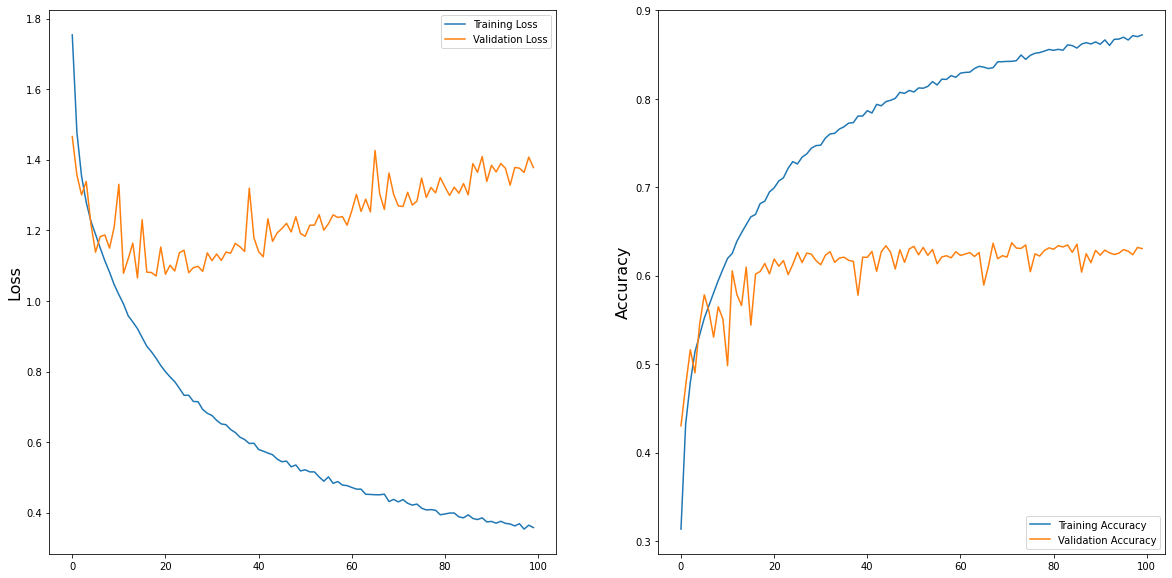

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [10]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

221/221 [==============================] - 2s 11ms/step
[0, 5, 0, 0, 0, 0, 5, 5, 0, 5, 0, 0, 2, 0, 0, 3, 4, 0, 3, 0, 4, 0, 0, 0, 0, 0, 0, 4, 0, 3, 3, 4, 5, 0, 0, 5, 4, 0, 3, 5, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 5, 2, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 4, 0, 0, 0, 0, 5, 0, 0, 5, 0, 3, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 6, 0, 4, 0, 0, 4, 4, 0, 4, 5, 4, 0, 0, 0, 4, 5, 3, 0, 5, 5, 4, 0, 5, 0, 0, 2, 6, 4, 6, 0, 0, 4, 0, 3, 5, 5, 5, 0, 5, 0, 0, 0, 0, 0, 4, 5, 0, 5, 0, 4, 0, 0, 0, 4, 5, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 4, 0, 0, 6, 0, 2, 0, 3, 5, 6, 0, 0, 5, 4, 5, 5, 5, 5, 0, 4, 0, 0, 5, 0, 0, 3, 2, 2, 5, 0, 0, 0, 0, 0, 4, 4, 5, 2, 5, 5, 5, 5, 0, 3, 5, 5, 0, 0, 0, 0, 0, 0, 4, 4, 0, 1, 0, 4, 0, 3, 5, 4, 5, 0, 0, 2, 0, 1, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 5, 5, 0, 0, 0, 0, 4, 3, 2, 6, 0, 0, 5, 4, 5, 0, 0, 5, 0, 5, 3, 0, 3, 0, 4, 0, 4, 0, 0, 0, 0, 0, 2, 0, 0, 5, 0, 0, 0, 5, 5, 0, 0, 0, 3, 5, 0, 0, 0, 2, 4, 1, 5, 0, 0, 0, 5, 4, 1, 5, 5, 0, 5, 2, 0, 1, 0, 4, 5, 0, 3, 4, 3, 5, 0

<Figure size 432x288 with 0 Axes>

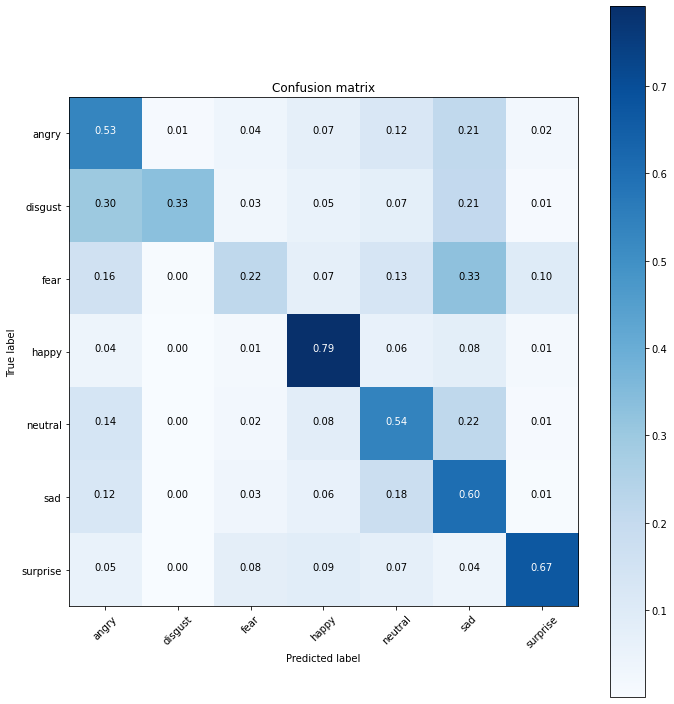

In [11]:
predictions = model.predict(validation_ds)
y_pred = [np.argmax(probas) for probas in predictions]
print(y_pred)
y_test = validation_ds.classes
class_names = validation_ds.class_indices.keys()

from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
# compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names)
plt.show()